In [1]:
import pathlib
data_root = pathlib.Path('/kaggle/input/the-oxfordiiit-pet-dataset/images/images')
print(data_root)

/kaggle/input/the-oxfordiiit-pet-dataset/images/images


In [2]:
all_image_paths = list(data_root.glob('*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths[:10]

['/kaggle/input/the-oxfordiiit-pet-dataset/images/images/american_pit_bull_terrier_16.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/leonberger_200.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/english_cocker_spaniel_35.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Siamese_67.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/boxer_77.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/saint_bernard_146.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/american_bulldog_37.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Sphynx_239.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Egyptian_Mau_164.jpg',
 '/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Birman_116.jpg']

In [3]:
all_image_labels = ['/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/' + pathlib.Path(path).name.replace(".jpg", ".png") for path in all_image_paths]
all_image_labels[:10]

['/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/american_pit_bull_terrier_16.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/leonberger_200.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/english_cocker_spaniel_35.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/Siamese_67.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/boxer_77.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/saint_bernard_146.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/american_bulldog_37.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/Sphynx_239.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/Egyptian_Mau_164.png',
 '/kaggle/input/the-oxfordiiit-pet-dataset/annotations/annotations/trimaps/Birman_116.png']

2022-03-30 03:04:16.684360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 03:04:16.758832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 03:04:16.759531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 03:04:16.761634: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Text(0.5, 1.0, 'american_pit_bull_terrier_16.jpg')

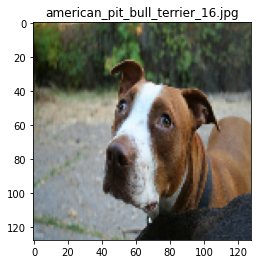

In [4]:
import tensorflow as tf

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image /= 255.0  # normalize to [0,1] range
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

import matplotlib.pyplot as plt

image_path = all_image_paths[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
plt.title(pathlib.Path(image_path).name)

Text(0.5, 1.0, 'american_pit_bull_terrier_16.png')

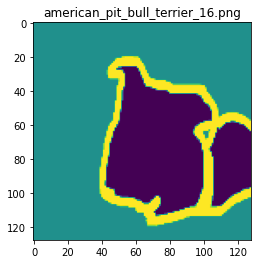

In [5]:
import tensorflow as tf

def preprocess_label(image):
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, [128, 128])
    image -= 1
    return image

def load_and_preprocess_label(path):
    image = tf.io.read_file(path)
    return preprocess_label(image)

import matplotlib.pyplot as plt

label = all_image_labels[0]

plt.imshow(load_and_preprocess_label(label))
plt.grid(False)
plt.title(pathlib.Path(label).name)

In [6]:
len(all_image_paths)

7390

In [7]:
train_image_paths = all_image_paths[0:6000]
train_label_paths = all_image_labels[0:6000]
test_image_paths = all_image_paths[6001:7301]
test_label_paths = all_image_labels[6001:7301]

In [8]:
train_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
train_image_ds = train_path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_label_ds = tf.data.Dataset.from_tensor_slices(train_label_paths)
train_mask_ds = train_label_ds.map(load_and_preprocess_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_image_label_ds = tf.data.Dataset.zip((train_image_ds, train_mask_ds))

test_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
test_image_ds = test_path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_label_ds = tf.data.Dataset.from_tensor_slices(test_label_paths)
test_mask_ds = test_label_ds.map(load_and_preprocess_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_image_label_ds = tf.data.Dataset.zip((test_image_ds, test_mask_ds))

2022-03-30 03:04:20.092425: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


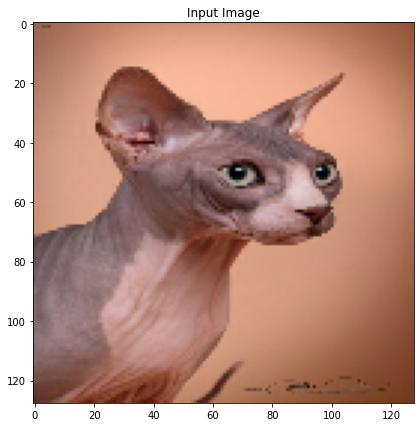

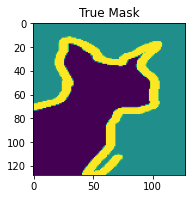

In [9]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        #plt.axis('off')
        plt.show()
        
for image, mask in test_image_label_ds.take(1):
    sample_image, sample_mask = image, mask
    
display([sample_image, sample_mask])

In [10]:
train_dataset = train_image_label_ds.cache().shuffle(1000).batch(64).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_image_label_ds.batch(64)

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# 使用这些层的激活设置
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [12]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))
    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))  
    result.add(tf.keras.layers.ReLU())
    return result

In [13]:
up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [14]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

  # 在模型中降频取样
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # 升频取样然后建立跳跃连接
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # 这是模型的最后一层
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [15]:
model = unet_model(3)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

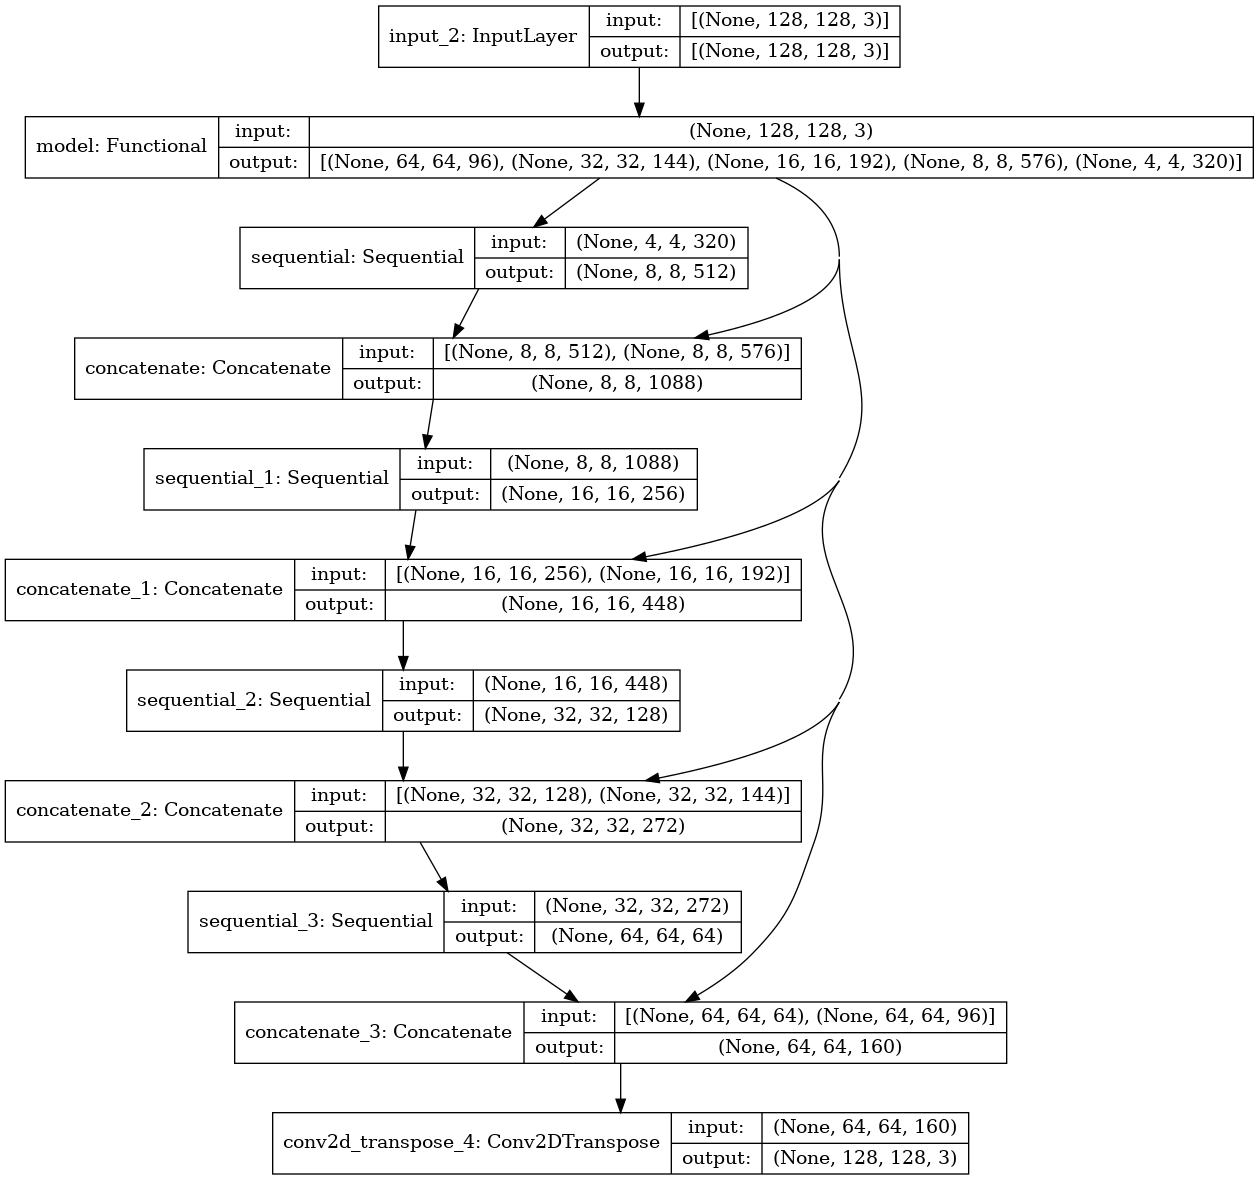

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                 create_mask(model.predict(sample_image[tf.newaxis, ...]))])

2022-03-30 03:04:26.881556: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


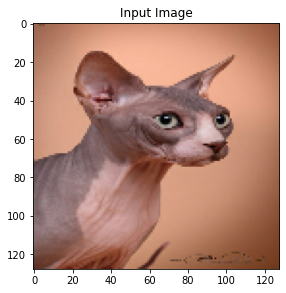

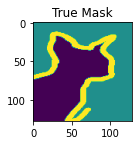

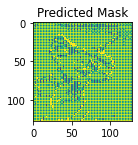

In [18]:
show_predictions()

In [19]:
from IPython.display import clear_output
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

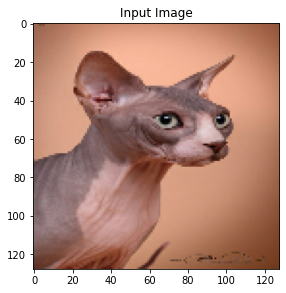

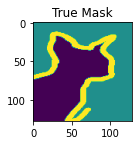

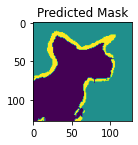


Sample Prediction after epoch 20



In [20]:
model_history = model.fit(train_dataset, epochs=20, steps_per_epoch=100, 
                          validation_steps=10,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

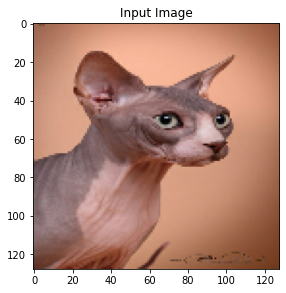

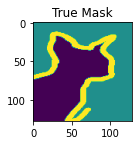

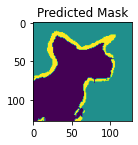

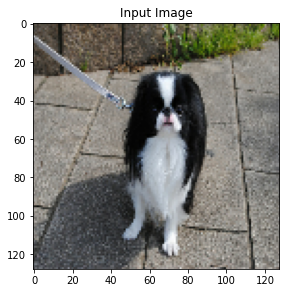

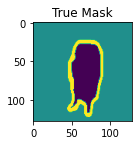

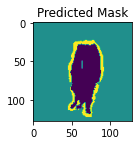

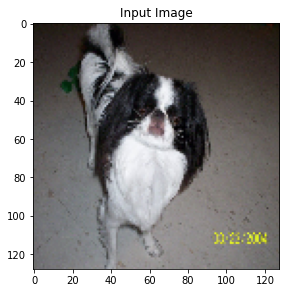

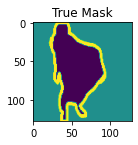

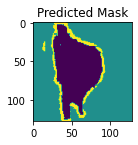

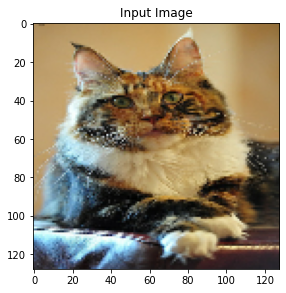

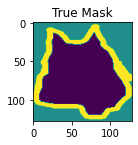

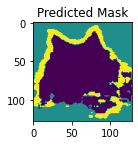

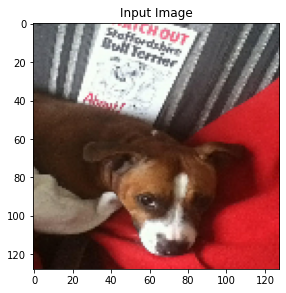

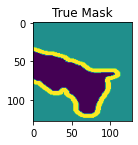

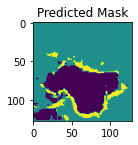

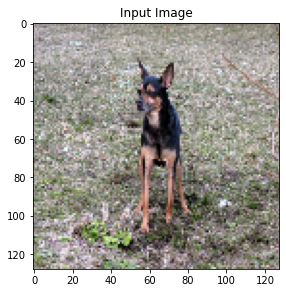

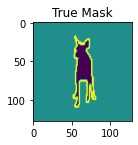

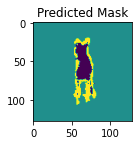

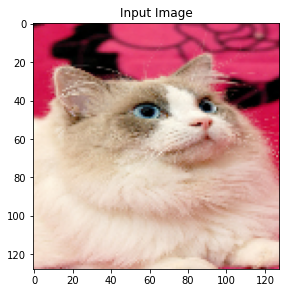

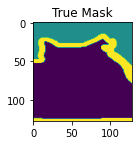

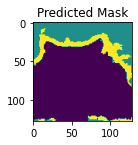

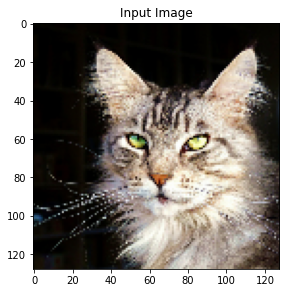

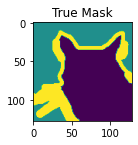

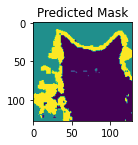

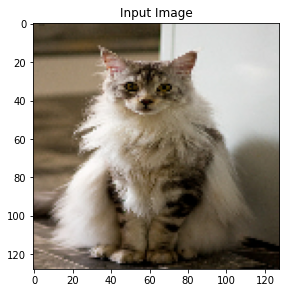

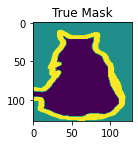

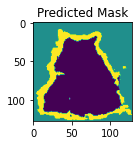

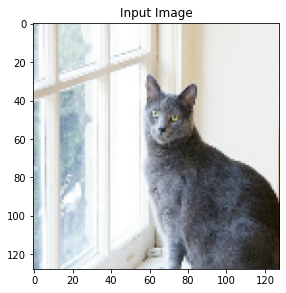

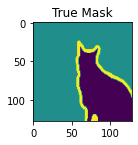

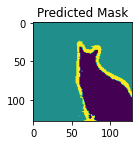

In [21]:
show_predictions(test_dataset, 10)